In [2]:
#importing required libraries
import numpy as np
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt

In [3]:
data_test = pd.read_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\bigmart_test.csv")
data_train = pd.read_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\bigmart_train.csv")

In [4]:
data_test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EXPLORATORY DATA ANALYSIS

## steps involved

###### > Analyse the columns of the given data
###### > Analyse the min, max, mean, count of each column using describe function (Numerical data)
###### > Use the isnull().sum() function to detect the missing values and replace them with mode or mean, or remove the coumn if missing >= (total/2)
###### > Analyse the values present in each column (unique()) and replace if any values are repeated in different forms
###### > Detect any ouliers and remove them 
###### > Visualize the data to gain insights
###### > Label Encoding

In [6]:
data_train.shape

(8523, 12)

In [7]:
data_test.shape

(5681, 11)

In [8]:
# Print the columns of the train dataset
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
# Print the columns of the test dataset
data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
data_train["source"] = "train"
data_test["source"] = "test"

In [12]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [13]:
#Concatenate the training and testing datasets
data = pd.concat([data_train,data_test], ignore_index = True)
print(data.shape)

(14204, 13)


In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [15]:
#The target variable here is the item_outlet_sales
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
data.isnull().sum()
#The Item_weight column has 2439 missing values, Outlet_size has 4016 and Item_outlet_sales has 5681 missing values

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [28]:
#The item_outlet_sales has 5681 missing values that could be predicted using our model

In [17]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [19]:
#calculating the outlet age
data["Outlet_age"] = 2022 - data["Outlet_Establishment_Year"]

In [20]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [21]:
#unique values in outlet_size
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
#Printing the count value of Item_Fat_Content
data.Item_Fat_Content.value_counts()

#Items with low fat is most abundant

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [23]:
#Print the count value of outlet_Size
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [24]:
### Using MODE function to find out the most common value for the outlet_Size
x = data["Outlet_Size"].mode()[0]

### REPLACING THE MISSING VALUES

In [25]:
#replacing the missing values of the Item_Weight and Outlet_Size 
#Replaing the missing values of the Outlet_Size with the values "medium"
#as it is Predominant in the data
data["Outlet_Size"] = data["Outlet_Size"].fillna(x) 

In [26]:
#Replacing the missing values of the item_Weight with the MEAN Value
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

### Visualisation of Data

<AxesSubplot:>

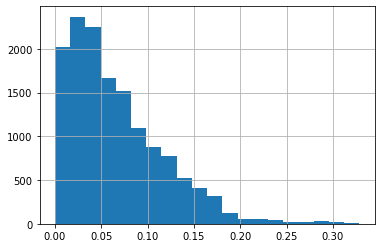

In [27]:
#Plotting a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins = 20)

### Detecting outliers

In [28]:
#Commonly used rule- A datapoint is a outlier if it is 1.5 X IQR 
#above the 3rd quartile (Q3) or below the first quartile(Q1)

Q1 = data["Item_Visibility"].quantile(0.25)
print(Q1)

0.027035682499999998


In [29]:
Q3 = data["Item_Visibility"].quantile(0.75)
print(Q3)

0.0940372535


In [30]:
IQR = Q3-Q1
print(IQR)

0.06700157100000001


In [31]:
#outlier range: 
R1 = IQR*1.5 + Q3
R2 = -IQR*1.5 + Q1

In [32]:
fill_data = data.query('(@R2<=Item_Visibility<=@R1)')

In [34]:
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [35]:
fill_data.describe()
#We managed to remove the outliers with respect to the Item_Visibility

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,13943.000000,13943.000000,13943.000000,13943.000000,8375.000000,13943.000000
mean,12.797420,0.062629,141.049800,1997.952449,2213.844862,24.047551
std,4.251448,0.045531,62.075285,8.354605,1703.407101,8.354605
min,4.555000,0.000000,31.290000,1985.000000,33.290000,13.000000
25%,9.300000,0.026768,94.046200,1987.000000,875.859900,18.000000
50%,12.792854,0.052708,142.247000,1999.000000,1830.950000,23.000000
75%,16.000000,0.091369,185.891100,2004.000000,3124.599400,35.000000
max,21.350000,0.193773,266.888400,2009.000000,13086.964800,37.000000


In [83]:
data = fill_data

In [84]:
data.shape

(13943, 16)

### Catagorizing a numerical data

In [85]:
#catagorizing the Item_Visibility into three columns
data["Item_Visibility"] = pd.cut(data["Item_Visibility"],[0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'] )

In [86]:
data.isnull().sum()

Item_Identifier                  0
Item_Weight                      0
Item_Fat_Content                 0
Item_Visibility              13943
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                      0
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales             5568
source                           0
Outlet_age                       0
Item_fat_Content                 0
Item_Type_Combined               0
dtype: int64

In [87]:
data["Item_Visibility"].value_counts()

Low Viz     0
Viz         0
High Viz    0
Name: Item_Visibility, dtype: int64

In [88]:
data["Item_Visibility"] = data["Item_Visibility"].fillna('Low Viz')

In [89]:
data["Item_Visibility"].value_counts()

Low Viz     13943
Viz             0
High Viz        0
Name: Item_Visibility, dtype: int64

In [90]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_age                      0
Item_fat_Content                0
Item_Type_Combined              0
dtype: int64

In [91]:
### There were various representations for low fat and regular in Item_Fat_Content
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat","LF"], "Low Fat")
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["reg"], "Regular")


In [92]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Label Encoding

In [93]:
le = LabelEncoder()

In [94]:
#Transform item_fat_content
data["Item_fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [95]:
#Transform Item_Visibility
data["Item_Visibility"] = le.fit_transform(data["Item_Visibility"])

In [96]:
#Transform Outlet_Size
data["Outlet_Size"] = le.fit_transform(data["Outlet_Size"])

In [97]:
#Transform Outlet_Location_Type
data["Outlet_Location_Type"] = le.fit_transform(data["Outlet_Location_Type"])

In [98]:
#Print the unique values of Output_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [99]:
#Create dummies for Outlet
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [100]:
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [101]:
#Lets combine the item type
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [102]:
#As there are multiple catagories in Item_Identifier, lets reduce the mapping
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data['Item_Type_Combined'].value_counts()

FD    9991
NC    2652
DR    1300
Name: Item_Type_Combined, dtype: int64

In [103]:
#Mapping can also be done using the .replace() function
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food',
                                                             'NC': 'Non-Consumables',
                                                             'DR':'Drinks'})

In [104]:
data['Item_Type_Combined'].value_counts()

Food               9991
Non-Consumables    2652
Drinks             1300
Name: Item_Type_Combined, dtype: int64

In [105]:
data.shape

(13943, 16)

In [106]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_age,Item_fat_Content
count,13943.000000,13943.0,13943.000000,13943.000000,13943.000000,13943.000000,8375.000000,13943.000000,13943.000000
mean,12.797420,0.0,141.049800,1997.952449,1.164455,1.115470,2213.844862,24.047551,0.352220
std,4.251448,0.0,62.075285,8.354605,0.600166,0.808615,1703.407101,8.354605,0.477679
min,4.555000,0.0,31.290000,1985.000000,0.000000,0.000000,33.290000,13.000000,0.000000
25%,9.300000,0.0,94.046200,1987.000000,1.000000,0.000000,875.859900,18.000000,0.000000
50%,12.792854,0.0,142.247000,1999.000000,1.000000,1.000000,1830.950000,23.000000,0.000000
75%,16.000000,0.0,185.891100,2004.000000,2.000000,2.000000,3124.599400,35.000000,1.000000
max,21.350000,0.0,266.888400,2009.000000,2.000000,2.000000,13086.964800,37.000000,1.000000


In [107]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age,Item_fat_Content,Item_Type_Combined
0,FDA15,9.30,Low Fat,0,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,23,0,Food
1,DRC01,5.92,Regular,0,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,13,1,Drinks
2,FDN15,17.50,Low Fat,0,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,23,0,Food
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,24,1,Food
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,35,0,Non-Consumables


In [108]:
#Applying ONE HOT ENCODING on all the catagorical values
data = pd.get_dummies(data, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [109]:
#Before
data.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                         int32
Item_Type                              object
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Establishment_Year               int64
Item_Outlet_Sales                     float64
source                                 object
Outlet_age                              int64
Item_fat_Content                        int32
Item_Fat_Content_Low Fat                uint8
Item_Fat_Content_Regular                uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1           uint8
Outlet_Type_Supermarket Type2     

In [110]:
#After
data.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                         int32
Item_Type                              object
Item_MRP                              float64
Outlet_Identifier                      object
Outlet_Establishment_Year               int64
Item_Outlet_Sales                     float64
source                                 object
Outlet_age                              int64
Item_fat_Content                        int32
Item_Fat_Content_Low Fat                uint8
Item_Fat_Content_Regular                uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1           uint8
Outlet_Type_Supermarket Type2     

In [111]:
#Dropping columns that were replaced with others
#Also the unecessary Items
data.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'], axis = 1, inplace = True)

In [112]:
#Divide the dataset back to test and train
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

In [113]:
#Exporting the modified versions of the file
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

### Model Building

In [114]:
#Only use relevent columns for model Building

In [115]:
#Print dtypes of train
train.dtypes

Item_Weight                           float64
Item_Visibility                         int32
Item_MRP                              float64
Outlet_Identifier                      object
Item_Outlet_Sales                     float64
source                                 object
Outlet_age                              int64
Item_fat_Content                        int32
Item_Fat_Content_Low Fat                uint8
Item_Fat_Content_Regular                uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1           uint8
Outlet_Type_Supermarket Type2           uint8
Outlet_Type_Supermarket Type3           uint8
Item_Type_Combined_Drinks               uint8
Item_Type_Combined_Food           

In [117]:
x_train = train.drop(["Outlet_Identifier","source","Item_Outlet_Sales"],axis = 1)
y_train = train["Item_Outlet_Sales"]

In [119]:
# Drop The irrelevent variables from the test dataset
test.dtypes

Item_Weight                           float64
Item_Visibility                         int32
Item_MRP                              float64
Outlet_Identifier                      object
Item_Outlet_Sales                     float64
source                                 object
Outlet_age                              int64
Item_fat_Content                        int32
Item_Fat_Content_Low Fat                uint8
Item_Fat_Content_Regular                uint8
Outlet_Location_Type_0                  uint8
Outlet_Location_Type_1                  uint8
Outlet_Location_Type_2                  uint8
Outlet_Size_0                           uint8
Outlet_Size_1                           uint8
Outlet_Size_2                           uint8
Outlet_Type_Grocery Store               uint8
Outlet_Type_Supermarket Type1           uint8
Outlet_Type_Supermarket Type2           uint8
Outlet_Type_Supermarket Type3           uint8
Item_Type_Combined_Drinks               uint8
Item_Type_Combined_Food           

In [121]:
x_test = test.drop(['Item_Outlet_Sales','Outlet_Identifier','source'],axis =1)
y_test = test['Item_Outlet_Sales']

In [122]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_fat_Content,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumables
0,9.300,0,249.8092,23,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.920,0,48.2692,13,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.500,0,141.6180,23,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.200,0,182.0950,24,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.930,0,53.8614,35,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,214.5218,35,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
8519,8.380,0,108.1570,20,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8520,10.600,0,85.1224,18,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
8521,7.210,0,103.1332,13,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [128]:
y_train.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
1803.6522     1
561.9352      1
1755.7146     1
4060.7142     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3473, dtype: int64

In [123]:
x_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_fat_Content,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumables
8523,20.750000,0,107.8622,23,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
8524,8.300000,0,87.3198,15,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0,241.7538,24,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
8526,7.315000,0,155.0340,15,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0,234.2300,37,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0,141.3154,25,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
14200,7.600000,0,169.1448,13,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
14201,10.000000,0,118.7440,20,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
14202,15.300000,0,214.6218,15,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [130]:
#We have to predict these values
y_test.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Item_Outlet_Sales, dtype: float64

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
#create train and test split
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_train,y_train, test_size = 0.3, random_state = 46)

In [134]:
#Fitting Training dataset into the linear regression model
lr = LinearRegression()
lr.fit(xTrain,yTrain)

LinearRegression()

In [135]:
# Find the coeff and the intercepts
print(lr.coef_, lr.intercept_)

[ 5.74147955e-01 -7.10542736e-15  1.60415218e+01 -3.72173403e+01
  1.98376993e+01 -1.98376993e+01  1.98376993e+01  2.00211014e+02
 -1.12572039e+01 -1.88953810e+02  5.00665652e+02 -2.92015595e+02
 -2.08650057e+02 -1.65594856e+03 -1.12275217e+02 -4.48382321e+02
  2.21660610e+03  1.41203856e+01 -1.37987566e+01 -3.21628959e-01] 1122.2813528852184


In [136]:
#predict the test series data
pred = lr.predict(xTest)

In [138]:
pred.shape

(2513,)

In [139]:
#RMSE for the model
print(sqrt(mean_squared_error(yTest,pred)))

1139.4003299864326


In [140]:
#Predicting the test data values
res = lr.predict(x_test)

In [141]:
res

array([1770.75367176, 1579.85777584, 1958.46929886, ..., 1852.80314397,
       3625.99461642, 1273.76685028])

In [150]:
res.shape


(5568,)

In [151]:
test.shape

(5568, 23)

In [160]:
#combining the predictions to the test dataframe
x = test.loc[:, 'Item_Outlet_Sales']  
x = res.tolist()

In [161]:
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_age,Item_fat_Content,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumables,predictions
8523,20.750000,0,107.8622,OUT049,1770.753672,test,23,0,1,0,...,1,0,0,1,0,0,0,1,0,1770.753672
8524,8.300000,0,87.3198,OUT017,1579.857776,test,15,1,0,1,...,1,0,0,1,0,0,0,1,0,1579.857776
8525,14.600000,0,241.7538,OUT010,1958.469299,test,24,0,1,0,...,1,0,1,0,0,0,0,0,1,1958.469299
8526,7.315000,0,155.0340,OUT017,2606.017956,test,15,0,1,0,...,1,0,0,1,0,0,0,1,0,2606.017956
8527,12.792854,0,234.2300,OUT027,5271.503733,test,37,1,0,1,...,1,0,0,0,0,1,0,1,0,5271.503733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0,141.3154,OUT046,2369.952846,test,25,1,0,1,...,0,1,0,1,0,0,0,1,0,2369.952846
14200,7.600000,0,169.1448,OUT018,2452.684362,test,13,1,0,1,...,1,0,0,0,1,0,0,1,0,2452.684362
14201,10.000000,0,118.7440,OUT045,1852.803144,test,20,0,1,0,...,1,0,0,1,0,0,0,0,1,1852.803144
14202,15.300000,0,214.6218,OUT017,3625.994616,test,15,1,0,1,...,1,0,0,1,0,0,0,1,0,3625.994616


In [163]:
test.to_csv(r"C:\Users\rvikr\Downloads\2789_RES_Demo_Datasets\Demo Datasets\Lesson 4\Sales_Test_Predictions.csv")